In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#from terbilang import Terbilang 

In [29]:
energy=pd.read_csv("clean_data.csv")

#### Data Exploration

In [30]:
energy.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


In [31]:
energy.drop(columns='customers', inplace=True)
energy[energy['revenue'] < 0] = 0
energy.rename(columns={"stateDescription": "state", "sectorName": "category"}, inplace=True)

In [32]:
energy.head()

,year,month,state,category,price,revenue,sales
0,2001,1,Wyoming,all sectors,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,6.01,15.07136,250.60591


In [33]:
#checking unique values for the sector
try:
    energy['sectorName'].unique()
    indexSN = energy[energy['sectorName'] == 0].index
    energy.drop(indexSN, inplace=True)
except:pass
try:
    indexSN = energy[energy['year'] == 0].index
    energy.drop(indexSN, inplace=True)
except:pass

In [34]:
#concerting the price to dollars
energy['price_conv'] = energy['price'].apply(lambda x: x * 0.01)
energy['revenue_conv'] = energy['revenue'].apply(lambda x: int(x * 1000000))
energy['sales_conv'] = energy['sales'].apply(lambda x: int(x * 1000000))

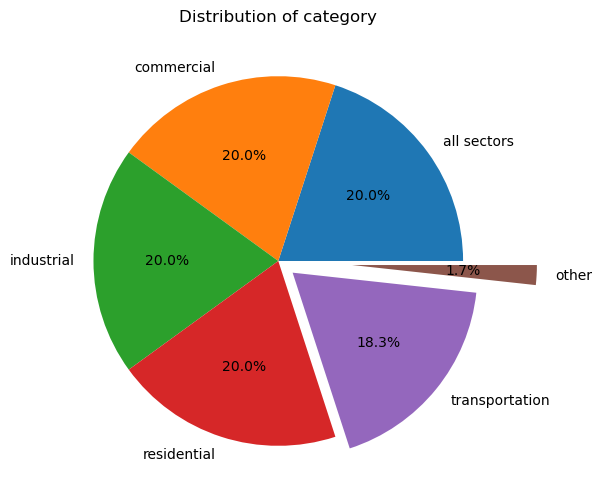

In [35]:
plt.figure(figsize=(6,6))
energy['category'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['all sectors','commercial','industrial','residential','transportation','other'],explode=[0,0,0,0,0.1,0.4])
plt.title('Distribution of category')
plt.ylabel('')
plt.show()

In [36]:
yearly_sales = energy.groupby('year')['sales_conv'].sum().reset_index()
yearly_sales

,year,sales_conv
0,2001,20366748623832
1,2002,20792796066312
2,2003,20962406916186
3,2004,21284876897901
4,2005,21965811077922
5,2006,22019513039983
6,2007,22587364271763
7,2008,22403787716480
8,2009,21580770805105
9,2010,22529048210694


In [37]:
max_sales_index = yearly_sales['sales_conv'].idxmax()
year_with_highest_sales = yearly_sales.loc[max_sales_index, 'year']
highest_sales_value = yearly_sales.loc[max_sales_index, 'sales_conv']

print("Year with the highest sales:", year_with_highest_sales)
print("Highest sales value:", highest_sales_value)

Year with the highest sales: 2022
Highest sales value: 23562994510142


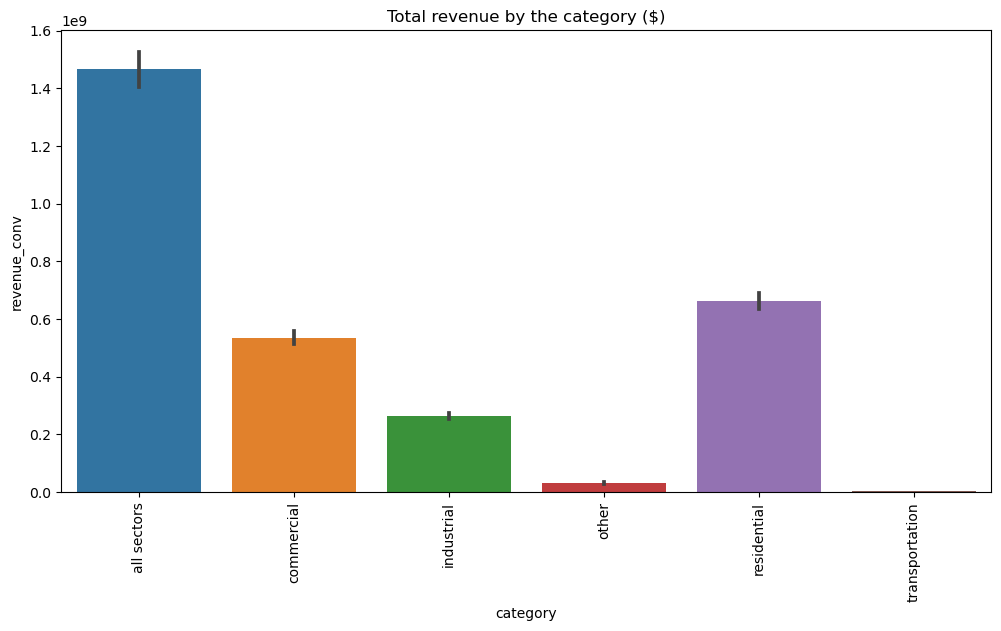

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(data=energy,x='category',y='revenue_conv')
plt.title('Total revenue by the category ($)')
plt.xlabel('category')
plt.ylabel('revenue_conv')
plt.xticks(rotation=90)
plt.show()

In [39]:
state_sales=energy.groupby('state')['sales'].sum().reset_index()
state_sales = state_sales.sort_values('sales', ascending=False)
state_sales

,state,sales
52,U.S. Total,1.711689e+08
47,South Atlantic,3.708804e+07
58,West South Central,2.635671e+07
9,East North Central,2.617694e+07
43,Pacific Contiguous,1.804497e+07
...,...,...
34,New Hampshire,5.017861e+05
13,Hawaii,4.500925e+05
46,Rhode Island,3.526782e+05
1,Alaska,2.788913e+05


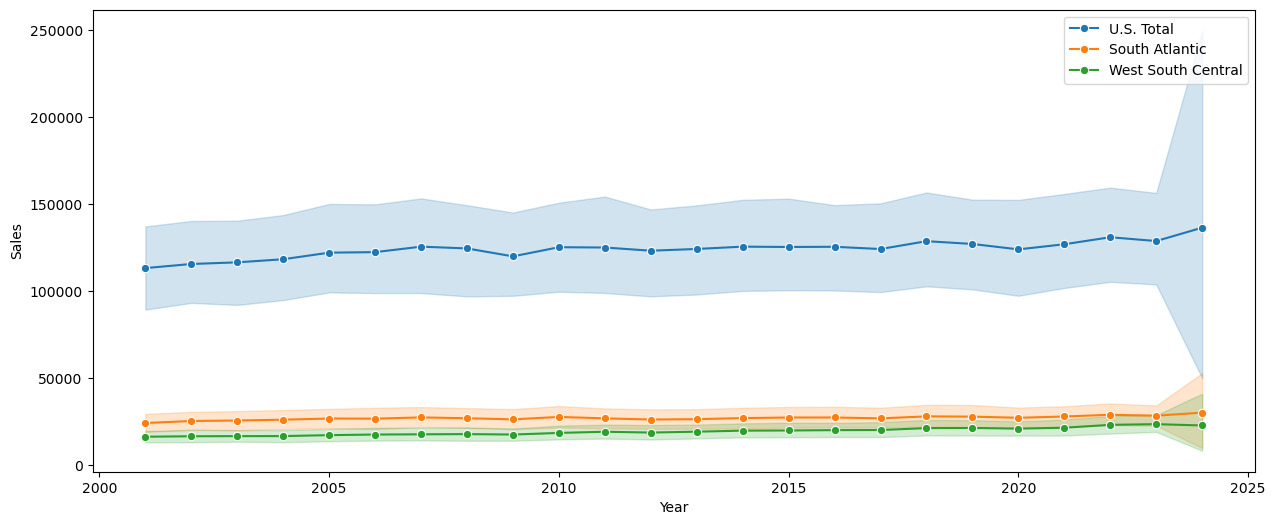

In [40]:
state_sales = state_sales[0:3].state.to_list()
plt.figure(figsize=(15,6))
sns.lineplot(data=energy[energy['state'] == state_sales[0]],x='year',y='sales',marker='o',label=state_sales[0])
sns.lineplot(data=energy[energy['state'] == state_sales[1]],x='year',y='sales',marker='o',label=state_sales[1])
sns.lineplot(data=energy[energy['state'] == state_sales[2]],x='year',y='sales',marker='o',label=state_sales[2])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

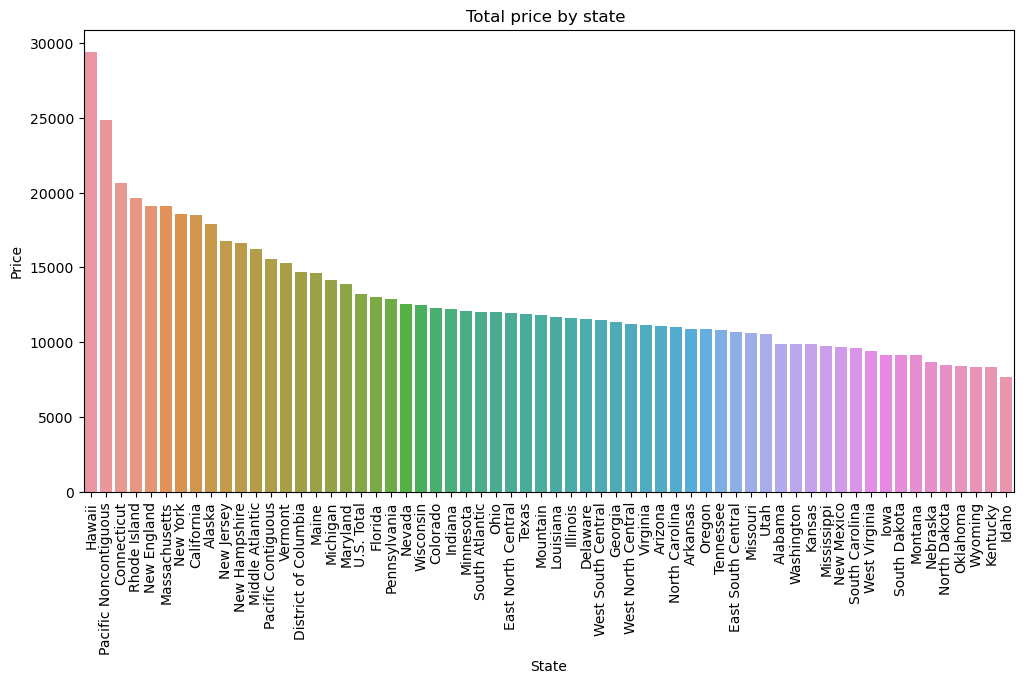

In [41]:
data=energy.groupby('state')['price'].sum().reset_index()
data = data.sort_values('price', ascending=False)
data.style.set_properties(**{'background-color': 'black',
                                    'color': 'lawngreen',
                                    'border': '1.5px  white'})
plt.figure(figsize=(12,6))
sns.barplot(data=data ,x='state',y='price')
plt.title('Total price by state ')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

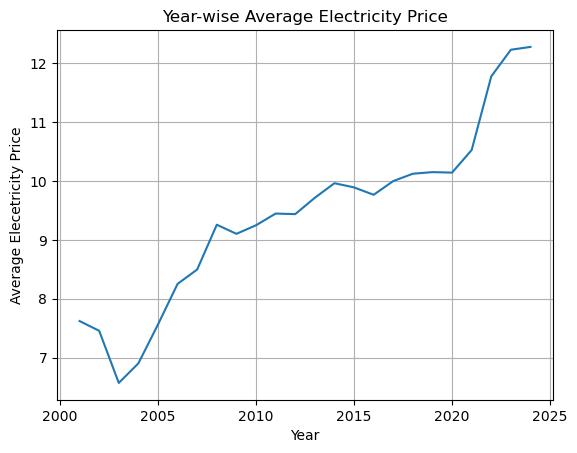

In [42]:
yearly_avg_price = energy.groupby('year')['price'].mean().reset_index()
plt.plot(yearly_avg_price['year'],yearly_avg_price['price'])
plt.title('Year-wise Average Electricity Price')
plt.xlabel('Year')
plt.ylabel('Average Elecetricity Price')
plt.grid(True)
plt.show() 

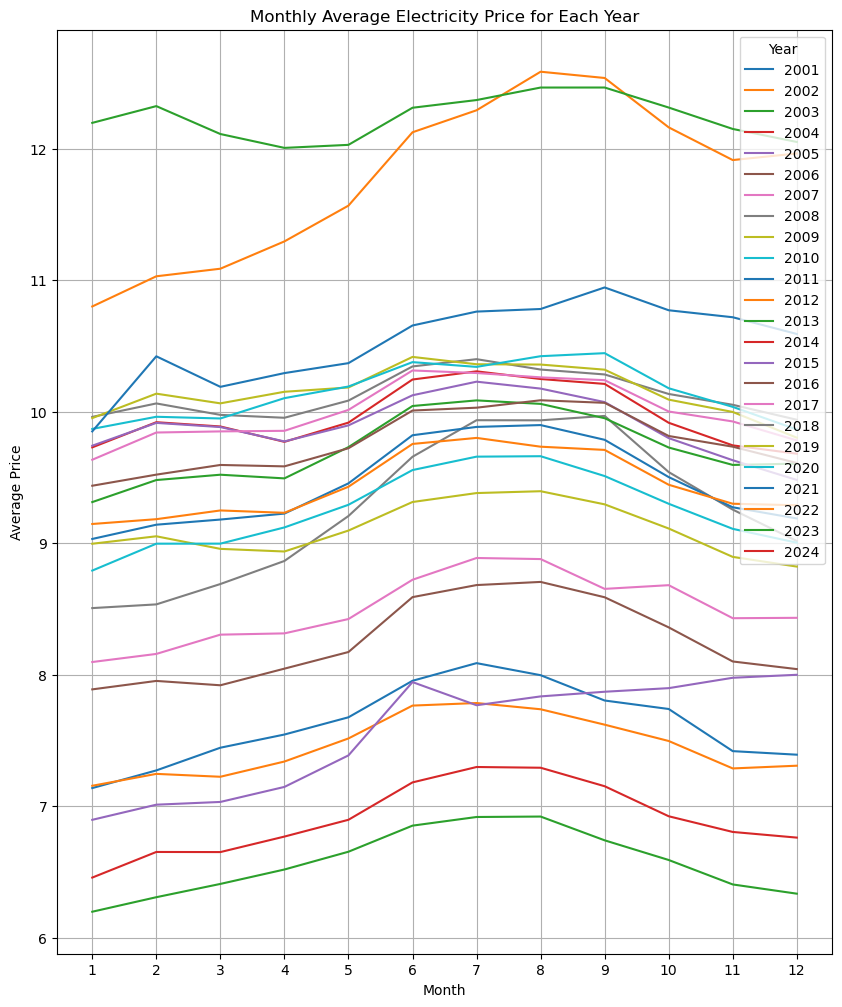

In [43]:
plt.figure(figsize=(10,12))
monthly_avg = energy.groupby(['year','month'])['price'].mean().reset_index()
for year in monthly_avg['year'].unique():
    data_by_year = monthly_avg[monthly_avg['year'] == year]
    plt.plot(data_by_year['month'], data_by_year['price'], label=year)

plt.title('Monthly Average Electricity Price for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show() 